# Plain-DNN for magnetic field 

## Navigating to the working directory containing the datasets and model

In [ ]:
#Download data to google drive
#!pip install google.colab
from google.colab import drive
import os

useGoogleDrive=False

if useGoogleDrive:
  drive.mount('/content/drive')
  #!mkdir -p /content/gdrive/My\ Drive/Data_and_model
  #os.chdir("/content/gdrive/My Drive/Data_and_model")

Mounted at /content/drive


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.7.0


In [ ]:
from platform import python_version
print(python_version())

3.7.12


In [ ]:
import os

if os.path.isdir('Data_2m_cone') and os.path.isdir('Data_2m_paraboloid') and os.path.isdir('Datasets_for_magfield'):
  print ("exists already - skipping")
else:
  !wget https://osf.io/tszn3/download
  !unzip 'download'
  !rm 'download'




exists already - skipping


True

In [ ]:
import requests as rq

rq.get('https://osf.io/e3g82/files/Model_and_Data_CPEC.zip', allow_redirects=True)


<Response [200]>

In [ ]:
!ls

In [ ]:
source_file = False

if source_file:
  from google.colab import drive
  drive.mount('/content/drive')
  source_file = '/content/drive/MyDrive/Data_and_model/Datasets_for_magfield'

else:
  source_file = '/clusterdata/uqvngu19/scratch/Data_and_model'



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Checking the current working GPU

In [ ]:
!nvidia-smi

Mon Oct 18 01:13:07 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    34W / 300W |   6745MiB / 16160MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Loading the datasets and doing feature engineering 

In [ ]:
# Loading data

import pickle
import os

# source_file_data_111 = '/content/drive/My Drive/part_C_all_1'
# os.chdir(source_file_data_111)

# with open('all_1_para', 'rb') as file_para:
#     para = pickle.load(file_para)
    
# with open('all_1_output_field', 'rb') as file_out:
#     output_field = pickle.load(file_out)
source_file = '/content/drive/MyDrive/Data_and_model/Datasets_for_magfield/Dataset_4m'

os.chdir(source_file)

with open('para_4m', 'rb') as file_para:
    para = pickle.load(file_para)
    
with open('output_field_4m', 'rb') as file_out:
    output_field = pickle.load(file_out)


# with open('out_s_x_test_scaled_200k', 'rb') as filename:
#   out_x_scaled = pickle.load(filename)

# with open('out_s_y_test_scaled_200k', 'rb') as filename:
#   out_y_scaled = pickle.load(filename)

In [ ]:
import os
#os.chdir('Datasets_for_magfield')
os.getcwd()


'/content/drive/MyDrive/Data_and_model/Datasets_for_magfield'

## Data cleaning

In [ ]:
# cleaning data
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import random
import numpy as np
import pickle

random.seed(123)

para_np = np.array(para)
output_field_np = np.array(output_field)

index = 0

q1, q3 = np.percentile(output_field_np[:, index], [25, 75])

upper = q3 + 1.5*(q3-q1)
lower = q1 - 1.5*(q3-q1)

mask = (output_field_np[:, index] > lower)*(output_field_np[:, index] < upper)

mask_index = np.where(mask)[0]

clean_0 = output_field_np[:, index][mask]

para_0 = para_np[mask_index]

#x_train, x_test, y_train, y_test = train_test_split(para_np, output_field_np, test_size=.20, shuffle=True)

In [ ]:
upper = q3 + 1.5*(q3-q1)
lower = q1 - 1.5*(q3-q1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


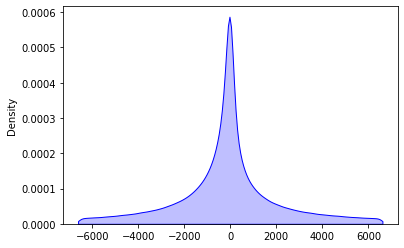

In [ ]:
import seaborn as sns
sns.distplot(clean_0, kde=True, hist=False, rug=False, kde_kws={"shade": True, "bw_adjust": 1, "cut":0, "bw_method": 'silverman'}, color='b')


(array([  70968.,  100725.,  157909.,  295655., 1048347.,  782198.,
         227970.,  131594.,   90560.,   67046.]),
 array([-6.62001942e+03, -5.29674832e+03, -3.97347722e+03, -2.65020612e+03,
        -1.32693502e+03, -3.66391639e+00,  1.31960718e+03,  2.64287828e+03,
         3.96614938e+03,  5.28942048e+03,  6.61269159e+03]),
 <a list of 10 Patch objects>)

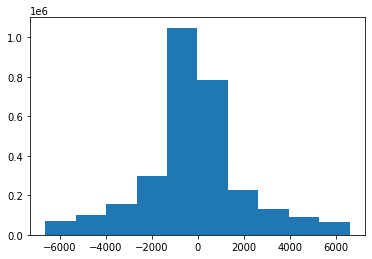

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.hist(clean_0)
# plt.hist(output_field_np[:, 0])
#sns.distplot(output_field_np[:, 0], kde=True, hist=False, rug=False, kde_kws={"shade": True, "bw_adjust": 1, "cut":0, "bw_method": 'silverman'}, color='b')


(array([360514., 337988., 321432., 308139., 295607., 286427., 277318.,
        269350., 261247., 254950.]),
 array([ 3.00005354,  7.70004723, 12.40004092, 17.10003461, 21.80002831,
        26.500022  , 31.20001569, 35.90000938, 40.60000307, 45.29999676,
        49.99999046]),
 <a list of 10 Patch objects>)

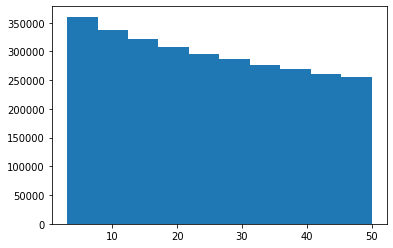

In [ ]:
# mask = np.argwhere(output_field_np <= q3)
# mask.shape

from matplotlib import pyplot as plt

plt.hist(para_0[:,0])

#np.unique(output_field_np[:, 0], return_counts=True)


In [ ]:
output_field_np.shape

(2000000, 3)

## Feature engineering for clean data

In [ ]:
#
# Feature engineering

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import random
import numpy as np
import pickle
import os

random.seed(123)


# folder_ = os.path.join(source_file, 'new_data_IQR')
# os.chdir(folder_)

para_np = para_0 #np.array(para)
output_field_np = clean_0 #np.array(output_field)

#q1, q3 = np.percentile(output_field_np, [5, 95])

x_train, x_test, y_train, y_test = train_test_split(para_np, output_field_np, test_size=.10, shuffle=True)

x_sScaler = StandardScaler()
x_sScaler.fit(x_train)
s_x_train_scaled = x_sScaler.transform(x_train)
s_x_test_scaled = x_sScaler.transform(x_test)

y_sScaler = StandardScaler()
y_sScaler.fit(y_train.reshape(-1, 1))
s_y_train_scaled = y_sScaler.transform(y_train.reshape(-1, 1))
s_y_test_scaled = y_sScaler.transform(y_test.reshape(-1, 1))


# # Saving training, testing and scalers data


with open('re_s_x_train_scaled_ax', 'wb') as filename:
  pickle.dump(s_x_train_scaled, filename)

with open('re_s_y_train_scaled_ax', 'wb') as filename:
  pickle.dump(s_y_train_scaled, filename)

with open('re_s_x_test_scaled_ax', 'wb') as filename:
  pickle.dump(s_x_test_scaled, filename)

with open('re_s_y_test_scaled_ax', 'wb') as filename:
  pickle.dump(s_y_test_scaled, filename)

with open('re_x_sScaler_ax', 'wb') as filename:
  pickle.dump(x_sScaler, filename)

with open('re_y_sScaler_ax', 'wb') as filename:
  pickle.dump(y_sScaler, filename)

## Loading ready processed datasets

In [1]:
import pickle
import os

#source_file = '/content/drive/MyDrive/Data_and_model/Datasets_for_magfield/Dataset_4m'

#folder_ = os.path.join(source_file, 'new_data_IQR')

source_file = '/clusterdata/uqvngu19/scratch/Data_and_model/Datasets_for_magfield/Dataset_4m'

os.chdir(source_file)

with open('re_s_x_train_scaled_ax', 'rb') as filename:
  s_x_train_scaled = pickle.load(filename)

with open('re_s_y_train_scaled_ax', 'rb') as filename:
  s_y_train_scaled = pickle.load(filename)

with open('re_s_x_test_scaled_ax', 'rb') as filename:
  s_x_test_scaled = pickle.load(filename)

with open('re_s_y_test_scaled_ax', 'rb') as filename:
  s_y_test_scaled = pickle.load(filename)

with open('re_x_sScaler_ax', 'rb') as filename:
  x_sScaler = pickle.load(filename)

with open('re_y_sScaler_ax', 'rb') as filename:
  y_sScaler = pickle.load(filename)

# importing data for out of training intervals

# with open('out_s_x_test_scaled_200k', 'rb') as filename:
#   out_x_scaled = pickle.load(filename)

# with open('out_s_y_test_scaled_200k', 'rb') as filename:
#   out_y_scaled = pickle.load(filename)

In [ ]:
import numpy as np
min_ = np.min(s_y_train_scaled)
max_ = np.max(s_y_train_scaled)

out_min_ = np.min(out_y_scaled)
out_max_ = np.max(out_y_scaled)
print(f'Field interval for the training data is: [{min_}, {max_}]')
print(f'Field interval for the out of training intervals is: [{out_min_}, {out_max_}]')

Field interval for the training data is: [-23.610358434445427, 23.999540757658966]
Field interval for the out of training intervals is: [-2.3426246433144176, 2.2994854937939446]


In [ ]:
with open('out_para_200k', 'rb') as filename:
  out_para_scaled = pickle.load(filename)

In [ ]:
x_train.shape

(900000, 9)

## PlainDNN model development

In [10]:
# Plain DNN model


import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Add, Concatenate, Activation


# Define a customised loss function

def loss_func(y_true, y_pred): 
    
    # Root mean square loss
    squared_difference = tf.square(y_true - y_pred)
    mean_square_loss = tf.reduce_mean(squared_difference, axis=-1)
    root_mean_square_loss = tf.sqrt(mean_square_loss)
    
    return root_mean_square_loss 
 
def loss_func_with_weights(y_true, y_pred): 

    alpha = 3.0
    beta = 5.0
    sq = tf.square(y_true - y_pred)
    sq1 = tf.reshape(sq[:, 0], shape=(-1, 1)) 
    sq2 = tf.reshape(alpha*sq[:, 1], shape=(-1, 1))
    sq3 = tf.reshape(beta*sq[:, 2], shape=(-1, 1))
    sq4 = Concatenate(axis=-1)([sq1, sq2, sq3])
    mean_square_loss = tf.reduce_mean(sq4, axis=-1)
    root_mean_square_loss = tf.sqrt(mean_square_loss+1e-20)
    
    return root_mean_square_loss 

class PlainDNNModel(tf.keras.Model):
    def __init__(self):
        
        super(PlainDNNModel, self).__init__()
        
        self.dense1_1 = tf.keras.layers.Dense(796, activation=tf.nn.relu)
        self.dense1_2 = tf.keras.layers.Dense(796, activation=tf.nn.relu)
        self.dense1_3 = tf.keras.layers.Dense(796, activation=tf.nn.relu)


        self.dense2_1 = tf.keras.layers.Dense(796, activation=tf.nn.relu)
        self.dense2_2 = tf.keras.layers.Dense(796, activation=tf.nn.relu)
        self.dense2_3 = tf.keras.layers.Dense(796, activation=tf.nn.relu)


        self.dense3_1 = tf.keras.layers.Dense(796, activation=tf.nn.relu)
        self.dense3_2 = tf.keras.layers.Dense(796, activation=tf.nn.relu)
        self.dense3_3 = tf.keras.layers.Dense(796, activation=tf.nn.relu)
        self.dense3_4 = tf.keras.layers.Dense(796, activation=tf.nn.relu)
        self.dense3_o = tf.keras.layers.Dense(1)

        
    def call(self, inputs):
        
        x_1 = self.dense1_1(inputs)
        x_1 = self.dense1_2(x_1)
        x_1 = self.dense1_3(x_1)

        
        x_2 = self.dense2_1(x_1)
        x_2 = self.dense2_2(x_2)
        x_2 = self.dense2_3(x_2)

        x_3 = self.dense3_1(x_2)
        x_3 = self.dense3_2(x_3)
        x_3 = self.dense3_3(x_3)
        x_3 = self.dense3_4(x_3)
        x_3 = self.dense3_o(x_3)
        
        
        return x_3
    


PlainModel = PlainDNNModel()  


opt = tf.keras.optimizers.Adam(learning_rate=0.001, amsgrad=True, beta_1=.9, beta_2=.9999)

PlainModel.compile(optimizer=opt, loss='mse')

## Loading pre-trained model

In [3]:
import tensorflow as tf
import os
import numpy as np
from tensorflow.keras.layers import Add, Concatenate, Activation

source_file = '/clusterdata/uqvngu19/scratch/Data_and_model/Datasets_for_magfield/Dataset_4m'
# Define a customised loss function

def loss_func(y_true, y_pred): 
    
    # Root mean square loss
    squared_difference = tf.square(y_true - y_pred)
    mean_square_loss = tf.reduce_mean(squared_difference, axis=-1)
    root_mean_square_loss = tf.sqrt(mean_square_loss + 1e-20)
    
    return root_mean_square_loss 
 
def loss_func_with_weights(y_true, y_pred): 

    alpha = 3.0
    beta = 5.0
    sq = tf.square(y_true - y_pred)
    sq1 = tf.reshape(sq[:, 0], shape=(-1, 1)) 
    sq2 = tf.reshape(alpha*sq[:, 1], shape=(-1, 1))
    sq3 = tf.reshape(beta*sq[:, 2], shape=(-1, 1))
    sq4 = Concatenate(axis=-1)([sq1, sq2, sq3])
    mean_square_loss = tf.reduce_mean(sq4, axis=-1)
    root_mean_square_loss = tf.sqrt(mean_square_loss+1e-20)
    
    return root_mean_square_loss 

source_file_model = os.path.join(source_file, 're_HDNNmodel_IQR_ax')
if os.getcwd != source_file_model:
  os.chdir(source_file_model)

PlainModel = PlainDNNModel()  
PlainModel.load_weights('PlainDNN_400_796_clean') #PlainDNN_3001_noco


opt = tf.keras.optimizers.Adam(learning_rate=0.001, amsgrad=True, beta_1=.9, beta_2=.9999 )
#Hmodel = tf.keras.models.load_model('HDNN_300', compile=False)

PlainModel.compile(optimizer=opt, loss=loss_func) # the loss_func is good enough we don't need the loss_func_with_weights


In [ ]:
os.getcwd()

'/home/opc/vantai/Datasets_for_magfield/re_HDNNmodel'

In [ ]:
decay_steps = 40
step = [10, 100, 200, 300]
decay_rate = 0.5

for step in step:
  print(decay_rate**(step/decay_steps))

0.8408964152537145
0.1767766952966369
0.03125
0.005524271728019903


In [ ]:
y_train.shape

(900000,)

In [ ]:
os.chdir('../')
os.getcwd()


'/content/drive/MyDrive/Data_and_model/Datasets_for_magfield'

## Model training

In [11]:
import pickle
import time
import os
from datetime import datetime
#%load_ext tensorboard

now = datetime.now()
#os.mkdir('re_HDNNmodel_IQR_ax')

source_file_model = os.path.join('/clusterdata/uqvngu19/scratch/Data_and_model/Datasets_for_magfield/', 're_HDNNmodel_IQR_ax')
if os.getcwd != source_file_model:
  os.chdir(source_file_model)



filepath = os.path.join(os.getcwd(), 'PlainDNN_400_796_clean')

modelcheckpoint = tf.keras.callbacks.ModelCheckpoint(filepath=filepath, monitor='val_loss', 
                                                     mode='min', verbose=1, save_best_only=True, save_weights_only=True)

earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', verbose=1, mode='min', patience=20, min_delta=0.00005)

new_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', mode='min', verbose=1, patience=10, 
                                              factor=1/10, min_lr=1e-5)

path = "logs/fit/" + now.strftime("%Y/%m/%/d, %H/%M")

#tensorboard = tf.keras.callbacks.TensorBoard(log_dir=path, histogram_freq=1)

st = time.time()

history = PlainModel.fit(s_x_train_scaled, s_y_train_scaled, validation_split=.10, 
                     batch_size=512, epochs=400, callbacks=[earlystopping, modelcheckpoint, new_lr]) 

used_time = time.time() - st

with open('p796_history_400_clean', 'wb') as filename:
  pickle.dump(history.history, filename)

with open('p796_used_time_400_clean', 'wb') as filename:
  pickle.dump(used_time, filename)

#oss: 0.1562 - val_loss: 0.1343

Epoch 1/400
4704/4704 [==============================] - 37s 8ms/step - loss: 0.1384 - val_loss: 0.0357

Epoch 00001: val_loss improved from inf to 0.03573, saving model to /scratch/cvl/uqvngu19/Data_and_model/Datasets_for_magfield/re_HDNNmodel_IQR_ax/PlainDNN_400_796_clean
Epoch 2/400
4704/4704 [==============================] - 36s 8ms/step - loss: 0.0334 - val_loss: 0.0293

Epoch 00002: val_loss improved from 0.03573 to 0.02929, saving model to /scratch/cvl/uqvngu19/Data_and_model/Datasets_for_magfield/re_HDNNmodel_IQR_ax/PlainDNN_400_796_clean
Epoch 3/400
4704/4704 [==============================] - 36s 8ms/step - loss: 0.0247 - val_loss: 0.0227

Epoch 00003: val_loss improved from 0.02929 to 0.02270, saving model to /scratch/cvl/uqvngu19/Data_and_model/Datasets_for_magfield/re_HDNNmodel_IQR_ax/PlainDNN_400_796_clean
Epoch 4/400
4704/4704 [==============================] - 36s 8ms/step - loss: 0.0195 - val_loss: 0.0161

Epoch 00004: val_loss improved from 0.02270 to 0.01615, saving

## History plotting

Text(0, 0.5, 'Errors')

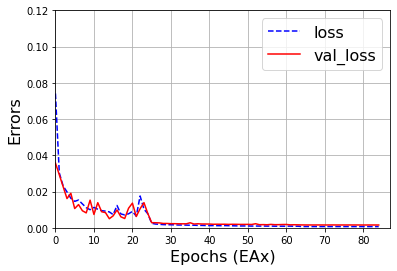

In [13]:
import pickle
import os
import pandas as pd
import matplotlib.pyplot as plt

source_file = '/clusterdata/uqvngu19/scratch/Data_and_model/Datasets_for_magfield'
source_file_model = os.path.join(source_file, 're_HDNNmodel_IQR_ax')

if os.getcwd() != source_file_model:
  os.chdir(source_file_model)


with open('p796_history_400_clean', 'rb') as filename:
  hist1 = pickle.load(filename)

pdhist1 = pd.DataFrame(hist1)
#pdhist2 = pd.DataFrame(hist2)


#pdhist = pd.concat([pdhist1, pdhist2], axis=0, ignore_index_=True)


pdhist1['loss'].plot(linestyle='--', c='b')
pdhist1['val_loss'].plot(c='r')

plt.legend(loc='upper right', fontsize=16)
plt.grid()
plt.xlim(0, 87)
plt.ylim(0, 0.12)

plt.xlabel('Epochs (EAx)', fontsize=16)
plt.ylabel('Errors', fontsize=16)

#plt.text(170, .05, r"$\hat\alpha = 1.0,$",fontsize=12)
#plt.text(170, .04, r"$\hat\beta = 1.0$",fontsize=12)

#plt.text(310, .05, r"$\hat\alpha = 1.8,$",fontsize=12)
#plt.text(310, .04, r"$\hat\beta = 2.5$",fontsize=12)

#plt.text(410, .05, r"$\hat\alpha = 3.0,$",fontsize=12)
#plt.text(410, .04, r"$\hat\beta = 5.0$",fontsize=12)

#plt.vlines(300, ymin=0, ymax=.12, linestyles='dotted')
#plt.vlines(400, ymin=0, ymax=.12, linestyles='dotted')

In [ ]:
PlainModel.summary()

Model: "plain_dnn_model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_110 (Dense)            multiple                  7960      
_________________________________________________________________
dense_111 (Dense)            multiple                  634412    
_________________________________________________________________
dense_112 (Dense)            multiple                  634412    
_________________________________________________________________
dense_113 (Dense)            multiple                  634412    
_________________________________________________________________
dense_114 (Dense)            multiple                  634412    
_________________________________________________________________
dense_115 (Dense)            multiple                  634412    
_________________________________________________________________
dense_116 (Dense)            multiple           

## Model testing

In [14]:
# Predicting the results
s_y_predicted_scaled = PlainModel.predict(s_x_test_scaled)

# Predicting the results
#y_predicted = PlainModel.predict(x_test)

In [ ]:
out_y_predicted_scaled = PlainModel.predict(out_x_scaled)


In [15]:
# Testing the model
from sklearn.metrics import r2_score, mean_squared_error
r2_score(s_y_test_scaled, s_y_predicted_scaled)

#r2_score(s_y_test_scaled[:, 0], s_y_predicted_scaled[:, 0])

0.9986449032419624

In [16]:
import scipy.stats as ss


ss.pearsonr(np.squeeze(s_y_test_scaled), np.squeeze(s_y_predicted_scaled))

(0.9993222308006319, 0.0)

In [ ]:
np.round(x_sScaler.inverse_transform(s_x_test_scaled)[10:20], decimals=2)

array([[ 2.2050e+01,  1.4740e+01,  1.8340e+01,  3.1970e+01,  5.3100e+00,
         5.1890e+01,  1.0000e+00,  0.0000e+00,  0.0000e+00],
       [ 3.3800e+01,  9.7900e+00,  1.7100e+01,  1.3667e+02,  4.1400e+00,
        -4.5130e+01,  1.0000e+00,  0.0000e+00,  0.0000e+00],
       [ 2.8060e+01,  1.5450e+01,  4.4830e+01,  9.6220e+01,  3.9000e+00,
         6.9680e+01,  0.0000e+00,  1.0000e+00,  0.0000e+00],
       [ 3.5800e+01,  1.4100e+01,  3.4900e+00,  3.9150e+01,  2.2300e+00,
         3.1740e+01,  0.0000e+00,  0.0000e+00,  1.0000e+00],
       [ 4.0550e+01,  4.5650e+01,  1.6580e+01,  1.3273e+02,  3.3700e+00,
        -1.4330e+01,  0.0000e+00,  1.0000e+00,  0.0000e+00],
       [ 3.2810e+01,  1.0640e+01,  3.0330e+01,  1.0670e+02,  3.2700e+00,
        -2.9860e+01,  1.0000e+00,  0.0000e+00,  0.0000e+00],
       [ 2.4950e+01,  4.7220e+01,  3.6500e+00,  9.8010e+01,  1.3000e-01,
         3.0330e+01,  1.0000e+00,  0.0000e+00,  0.0000e+00],
       [ 2.3850e+01,  1.0770e+01,  4.4720e+01,  7.3190e+01,  9

In [ ]:
np.round(y_sScaler.inverse_transform(s_y_predicted_scaled)[10:20], decimals=2)

array([[ 5485.96],
       [  181.69],
       [-2616.35],
       [  833.14],
       [  296.26],
       [ 1642.51],
       [  646.55],
       [-3013.74],
       [-1124.42],
       [ 6025.83]], dtype=float32)

In [ ]:
y_test = y_sScaler.inverse_transform(s_y_test_scaled)
np.round(y_test[10:20], decimals=2)

array([[ 5347.82],
       [  190.41],
       [-2604.41],
       [  859.41],
       [  318.97],
       [ 1611.42],
       [  650.14],
       [-2989.24],
       [ -851.69],
       [ 6157.46]])

In [18]:
y_pred = y_sScaler.inverse_transform(s_y_predicted_scaled).astype(np.float32)
y_test = y_sScaler.inverse_transform(s_y_test_scaled).astype(np.float32)


In [19]:
from sklearn.metrics import r2_score, mean_squared_error

np.sqrt(mean_squared_error(y_test, y_sScaler.inverse_transform(s_y_predicted_scaled)))

81.58237

In [20]:
81.58/np.subtract(*np.percentile(y_test, [5, 95]))

-0.009799602336394693

In [21]:
np.subtract(*np.percentile(y_test, [5, 95]))

-8324.827600097655

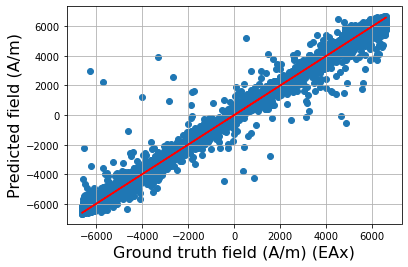

In [23]:
import matplotlib.pyplot as plt

y_pred = y_sScaler.inverse_transform(s_y_predicted_scaled)
y_test = y_sScaler.inverse_transform(s_y_test_scaled)

a, b = np.polyfit(np.squeeze(y_test), np.squeeze(y_pred), 1)
plt.scatter(y_test, y_pred)
plt.plot(y_test, a*y_test+b, color='r')
plt.xlabel('Ground truth field (A/m) (EAx)', fontsize=16)
plt.ylabel('Predicted field (A/m)', fontsize=16)
plt.grid('on')

mean: 0.3948181004411412, std: 0.8969372939188645


/scratch/cvl/uqvngu19/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


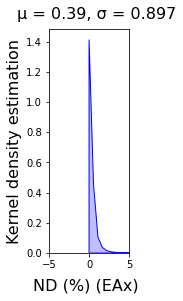

In [32]:
# Plotting pairs
# Not normalized
import seaborn as sns
index_ = 0

#vmin = np.min(s_y_test_scaled[:, index_])
#vmax = np.max(s_y_test_scaled[:, index_])
cmap = 'YlGnBu'
 # 0 for axial, 1 for azimuthal and 2 for radial components

height = [0.00148, 0.788, 0.00395]
low = [-0.000227, -0.12, -0.000588]
plt.figure(figsize=(10, 14))

interq_955 = np.subtract(*np.percentile(y_test, [95, 5]))
errors = abs(y_pred - y_test)*100/interq_955


# errors = (s_y_predicted_scaled[:, index_+1].reshape(400000,-1)-s_y_test_scaled[:, index_+1].reshape(400000,-1))*100/(
#     np.max(s_y_test_scaled[:, index_+1]) - np.min(s_y_test_scaled[:, index_+1]))



plt.subplot(342)
mean = np.mean(errors)
std = np.std(errors)

print('mean: {}, std: {}'.format(mean, std))

sns.distplot(errors, kde=True, hist=False, rug=False, kde_kws={"shade": True, "bw_adjust": 1, "cut":0, "bw_method": 'silverman'}, color='b')
#sns.kdeplot(data=errors, fill=True)
plt.xlim(-5, 5)
plt.text(-7, -0.25, 'ND (%) (EAx)', fontsize=16)
#plt.text(-20, 1.6*low[index_+1], 'j) Azimuthal component', fontsize=12)
# #plt.xlabel('b) Azimuthal component', fontsize=12)
plt.ylabel('Kernel density estimation', fontsize=16)
plt.text(-9, 1.55, '\u03BC = {:2.2}, \u03C3 = {:2.3}'.format(mean, std), fontsize=16) # height index_ .2 for axial; = 6.5 for azimuthal and .42 for radial
# #plt.tight_layout(rect=(0., 0., 1, 1))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=1., hspace=None)








